## San Francisco Crime Data Analysis on Databricks
### Ruiwen Zhang

### Introduction
I really like San Francisco because the weather and the terrain are pretty much similar to those in my hometown.The last time I went there, I felt like that I went back home. But I heard from one of my friends that San Francisco is not as safe as I thought. Thus, I decided to looking for the answer by making a crime data analysis in San Francisco using the big data analysis techniques. Hope I can extract some insights that visitors like me can benefit from as well as the other interested group like business owners and policy makers.

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
import os
dbutils.library.installPyPI("folium")
import folium
os.environ["PYSPARK_PYTHON"] = "python3"


In [0]:
# Read the dataset from the website of SF goverment and store the data in the databricks
import urllib.request
urllib.request.urlretrieve("https://data.sfgov.org/api/views/tmnf-yvry/rows.csv?accessType=DOWNLOAD", "/tmp/sf_03_18.csv")
dbutils.fs.mv("file:/tmp/sf_03_18.csv", "dbfs:/research/data/sf_03_18.csv")
#display(dbutils.fs.ls("dbfs:/research/data/"))



In [0]:
data_path = "dbfs:/research/data/sf_03_18.csv"
# use this file name later

#### Part 1: Understand the data and data preprocessing

In [0]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)

IncidntNum Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y Location PdId 146196161 NON-CRIMINAL LOST PROPERTY Tuesday 09/23/2014 01:00 SOUTHERN NONE 800 Block of BRYANT ST -122.403404791479 37.775420706711 POINT (-122.403404791479 37.775420706711) 14619616171000 150045675 ASSAULT BATTERY Thursday 01/15/2015 17:00 TARAVAL NONE 1800 Block of VICENTE ST -122.48560378101 37.7388214326705 POINT (-122.48560378101 37.7388214326705) 15004567504134 140632022 SUSPICIOUS OCC INVESTIGATIVE DETENTION Wednesday 07/30/2014 09:32 BAYVIEW NONE 100 Block of GILLETTE AV -122.396535107224 37.7106603302503 POINT (-122.396535107224 37.7106603302503) 14063202264085 150383259 ASSAULT BATTERY Saturday 05/02/2015 23:10 BAYVIEW ARREST, BOOKED 2400 Block of PHELPS ST -122.400130573297 37.7300925390327 POINT (-122.400130573297 37.7300925390327) 15038325904134 040753980 OTHER OFFENSES RECKLESS DRIVING Friday 07/02/2004 13:43 BAYVIEW NONE I-280 / CESAR CHAVEZ ST -120.5 90 POINT (-120.5 90) 4075398065020 040855122 SUICIDE SUICIDE BY JUMPING Tuesday 07/27/2004 15:19 SOUTHERN NONE 500 Block of I-80 -122.386667033903 37.7898821569191 POINT (-122.386667033903 37.7898821569191) 4085512260170 066085191 NON-CRIMINAL LOST PROPERTY Sunday 11/19/2006 17:45 BAYVIEW NONE 0 Block of GIANTS DR -122.38750147945 37.716878646429 POINT (-122.38750147945 37.716878646429) 6608519171000 050908404 VEHICLE THEFT STOLEN AUTOMOBILE Saturday 08/13/2005 17:00 TENDERLOIN NONE JENNINGS CT / INGALLS ST -120.5 90 POINT (-120.5 90) 5090840407021 090768064 ARSON ARSON OF A VEHICLE Tuesday 07/28/2009 23:26 BAYVIEW NONE SELBY ST / OAKDALE AV -122.399686082806 37.739901780585 POINT (-122.399686082806 37.739901780585) 9076806426031 111027676 ASSAULT BATTERY Saturday 12/24/2011 07:00 SOUTHERN NONE 0 Block of DORE ST -122.412933062384 37.7739274524819 POINT (-122.412933062384 37.7739274524819) 11102767604134 060508925 ASSAULT BATTERY Saturday 05/13/2006 11:26 NORTHERN NONE POLK ST / CEDAR ST -122.419834938618 37.7863580362743 POINT (-122.419834938618 37.7863580362743) 6050892504134 110318854 FRAUD FRAUDULENT CREDIT APPLICATION Thursday 04/14/2011 17:30 BAYVIEW NONE 100 Block of TOPEKA AV -122.398951090192 37.7338473162583 POINT (-122.398951090192 37.7338473162583) 11031885409340 131007921 SUSPICIOUS OCC SUSPICIOUS OCCURRENCE Thursday 11/28/2013 12:00 INGLESIDE NONE 1600 Block of DIAMOND ST -122.435709983124 37.7443688410754 POINT (-122.435709983124 37.7443688410754) 13100792164070 090333811 NON-CRIMINAL FOUND PROPERTY Monday 03/30/2009 21:00 NORTHERN NONE 300 Block of HAIGHT ST -122.428006990942 37.7724726132375 POINT (-122.428006990942 37.7724726132375) 9033381172000 050951798 NON-CRIMINAL LOST PROPERTY Saturday 08/20/2005 09:30 TENDERLOIN NONE 5THSTNORTH ST / EDDY ST -120.5 90 POINT (-120.5 90) 5095179871000 031057056 NON-CRIMINAL AIDED CASE, MENTAL DISTURBED Sunday 09/07/2003 11:37 SOUTHERN NONE 500 Block of I-80 -122.386667033903 37.7898821569191 POINT (-122.386667033903 37.7898821569191) 3105705664020 061079105 ASSAULT BATTERY Monday 10/09/2006 17:30 NORTHERN NONE 600 Block of WILLOW ST -122.42831052169 37.7823629069329 POINT (-122.42831052169 37.7823629069329) 6107910504134 050326981 VEHICLE THEFT STOLEN TRUCK Wednesday 03/23/2005 19:00 BAYVIEW NONE 0 Block of WATCHMAN WY -122.395251009931 37.7553443519568 POINT (-122.395251009931 37.7553443519568) 5032698107025 120444392 ASSAULT BATTERY Tuesday 06/05/2012 11:47 RICHMOND NONE 500 Block of ARGUELLO BL -122.458724812805 37.7802795296617 POINT (-122.458724812805 37.7802795296617) 12044439204134 051130171 VEHICLE THEFT VEHICLE, RECOVERED, AUTO Thursday 10/06/2005 17:30 RICHMOND NONE AVENUE OF THE PALMS / EUCLID AV -120.5 90 POINT (-120.5 90) 5113017107041 120767417 SECONDARY CODES DOMESTIC VIOLENCE Monday 09/24/2012 18:02 INGLESIDE ARREST, BOOKED 800 Block of BRUNSWICK ST -122.450482980088 37.708170291703 POINT (-122.450482980088 37.708170291703) 12076741715200 180210729 ASSAULT BATTERY Tuesday 03/20/2018 18:20 NORTHERN 

In [0]:
print(f"Number of columns of the data is {len(df_opt1.columns)}")
print(f"Number of rows of the data is {df_opt1.count()}")

Number of columns of the data is 13
Number of rows of the data is 2215024

In [0]:
df_opt1.printSchema()

root
-- IncidntNum: string (nullable = true)
-- Category: string (nullable = true)
-- Descript: string (nullable = true)
-- DayOfWeek: string (nullable = true)
-- Date: string (nullable = true)
-- Time: string (nullable = true)
-- PdDistrict: string (nullable = true)
-- Resolution: string (nullable = true)
-- Address: string (nullable = true)
-- X: string (nullable = true)
-- Y: string (nullable = true)
-- Location: string (nullable = true)
-- PdId: string (nullable = true)

In [0]:
from pyspark.sql.functions import isnan, when, count, col
df_opt1.select([count(when(col(c).isNull(), c)).alias(c) for c in df_opt1.columns]).show()

+----------+--------+--------+---------+----+----+----------+----------+-------+---+---+--------+----+
IncidntNum|Category|Descript|DayOfWeek|Date|Time|PdDistrict|Resolution|Address| X| Y|Location|PdId|
+----------+--------+--------+---------+----+----+----------+----------+-------+---+---+--------+----+
 0| 0| 0| 0| 0| 0| 1| 0| 0| 0| 0| 0| 0|
+----------+--------+--------+---------+----+----+----------+----------+-------+---+---+--------+----+

* Only one null value in the PdDistrict column. We can drop the row whose value in the PdDistrict is null

In [0]:
df_opt1 = df_opt1.na.drop() 
df_opt1.select([count(when(col(c).isNull(), c)).alias(c) for c in df_opt1.columns]).show()

+----------+--------+--------+---------+----+----+----------+----------+-------+---+---+--------+----+
IncidntNum|Category|Descript|DayOfWeek|Date|Time|PdDistrict|Resolution|Address| X| Y|Location|PdId|
+----------+--------+--------+---------+----+----+----------+----------+-------+---+---+--------+----+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+----------+--------+--------+---------+----+----+----------+----------+-------+---+---+--------+----+

In [0]:
df_opt1.groupby(df_opt1.columns).count().where('count > 1').show()

+----------+--------+--------+---------+----+----+----------+----------+-------+---+---+--------+----+-----+
IncidntNum|Category|Descript|DayOfWeek|Date|Time|PdDistrict|Resolution|Address| X| Y|Location|PdId|count|
+----------+--------+--------+---------+----+----+----------+----------+-------+---+---+--------+----+-----+
+----------+--------+--------+---------+----+----+----------+----------+-------+---+---+--------+----+-----+

* No duplicates in the dataset. We do not need to drop anything

#### Part 2: Online Analytical Processing (OLAP):

##### 2.1: Counts the number of distinct category

In [0]:
q1_result = df_opt1.select('category').distinct().count()
print(f"The number of crime category is {q1_result}")

The number of crime category is 39

In [0]:
# show each distinct category
display(df_opt1.select('category').distinct())

category FRAUD SUICIDE LIQUOR LAWS SECONDARY CODES FAMILY OFFENSES MISSING PERSON OTHER OFFENSES DRIVING UNDER THE INFLUENCE WARRANTS ARSON FORGERY/COUNTERFEITING GAMBLING BRIBERY ASSAULT DRUNKENNESS EXTORTION TREA WEAPON LAWS LOITERING SUSPICIOUS OCC ROBBERY SEX OFFENSES, FORCIBLE PROSTITUTION EMBEZZLEMENT BAD CHECKS DISORDERLY CONDUCT RUNAWAY RECOVERED VEHICLE VANDALISM DRUG/NARCOTIC PORNOGRAPHY/OBSCENE MAT TRESPASS NON-CRIMINAL VEHICLE THEFT STOLEN PROPERTY LARCENY/THEFT KIDNAPPING BURGLARY SEX OFFENSES, NON FORCIBLE

##### 2.2: Counts the number crimes for different categories

In [0]:
q2_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q2_result)

category count LARCENY/THEFT 480447 OTHER OFFENSES 309358 NON-CRIMINAL 238323 ASSAULT 194694 VEHICLE THEFT 126602 DRUG/NARCOTIC 119628 VANDALISM 116059 WARRANTS 101379 BURGLARY 91543 SUSPICIOUS OCC 80444 MISSING PERSON 64961 ROBBERY 55867 FRAUD 41542 SECONDARY CODES 25831 FORGERY/COUNTERFEITING 23050 WEAPON LAWS 22234 TRESPASS 19449 PROSTITUTION 16701 STOLEN PROPERTY 11891 SEX OFFENSES, FORCIBLE 11742 DISORDERLY CONDUCT 10040 DRUNKENNESS 9826 RECOVERED VEHICLE 8716 DRIVING UNDER THE INFLUENCE 5672 KIDNAPPING 5346 RUNAWAY 4440 LIQUOR LAWS 4083 ARSON 3931 EMBEZZLEMENT 2988 LOITERING 2430 SUICIDE 1292 FAMILY OFFENSES 1183 BAD CHECKS 925 BRIBERY 813 EXTORTION 741 SEX OFFENSES, NON FORCIBLE 431 GAMBLING 348 PORNOGRAPHY/OBSCENE MAT 59 TREA 14

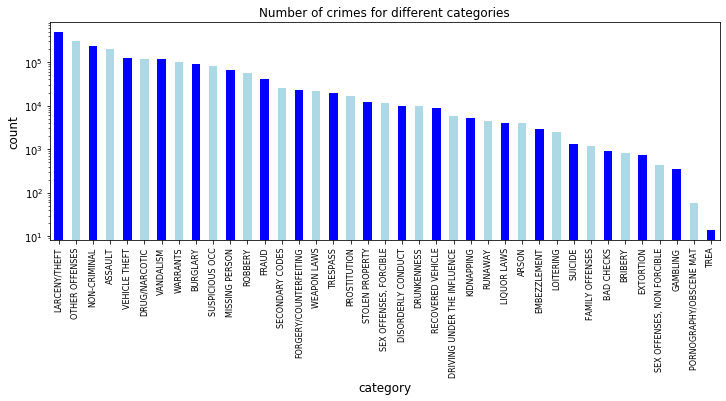

In [0]:
q2_df = q2_result.toPandas()
plt.figure()
my_colors = ['blue', 'lightblue']*5
ax = q2_df.plot(kind = 'bar',x='category',y = 'count',logy= True, color = my_colors ,legend = False, align = 'center', figsize=(12, 4))
ax.set_ylabel('count',fontsize = 12)
ax.set_xlabel('category',fontsize = 12)
plt.xticks(fontsize=8, rotation=90)
plt.title('Number of crimes for different categories')
display()

* Larceny/Theft and Other Offenses are the top 2 crime category with the highest number of occurrences

In [0]:
temp_df = df_opt1
temp_df = temp_df.selectExpr("Category","DayOfWeek","Date","Time","PdDistrict","Resolution",
                             "cast(Y as float) latitude", "cast(X as float) longitude","Location")
temp_df.registerTempTable("Temp")

sql_text = "select latitude,longitude,Category,PdDistrict from Temp"
tupleList = [[x["latitude"], x["longitude"],x['Category'],x['PdDistrict']]
             for x in sqlContext.sql(sql_text).rdd.collect()]

In [0]:
# Since I am using Databricks Community, I only plot first 1000 records on the map
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

incidents = folium.map.FeatureGroup()
for lst in tupleList[0:1000]:
    lat, lng = lst[0],lst[1]
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=4, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )

# Add incidents to map
san_map = folium.Map(location=[latitude, longitude], zoom_start=12)
san_map.add_child(incidents)


# add pop-up text to each marker on the map
for lst in tupleList[0:1000]:
    lat, lng, label = lst[0],lst[1],lst[2]
    folium.Marker([lat, lng], popup=label).add_to(san_map) 

# add incidents to map
san_map.add_child(incidents)

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=PCFET0NUWVBFIGh0bWw+CjxoZWFkPiAgICAKICAgIDxtZXRhIGh0dHAtZXF1aXY9ImNvbnRlbnQtdHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PVVURi04IiAvPgogICAgCiAgICAgICAgPHNjcmlwdD4KICAgICAgICAgICAgTF9OT19UT1VDSCA9IGZhbHNlOwogICAgICAgICAgICBMX0RJU0FCTEVfM0QgPSBmYWxzZTsKICAgICAgICA8L3NjcmlwdD4KICAgIAogICAgPHNjcmlwdCBzcmM9Imh0dHBzOi8vY2RuLmpzZGVsaXZyLm5ldC9ucG0vbGVhZmxldEAxLjYuMC9kaXN0L2xlYWZsZXQuanMiPjwvc2NyaXB0PgogICAgPHNjcmlwdCBzcmM9Imh0dHBzOi8vY29kZS5qcXVlcnkuY29tL2pxdWVyeS0xLjEyLjQubWluLmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9qcy9ib290c3RyYXAubWluLmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2NkbmpzLmNsb3VkZmxhcmUuY29tL2FqYXgvbGlicy9MZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy8yLjAuMi9sZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy5qcyI+PC9zY3JpcHQ+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vY2RuLmpzZGVsaXZyLm5ldC9ucG0vbGVhZmxldEAxLjYuMC9kaXN0L2xlYWZsZXQuY3NzIi8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vYm9vdHN0cmFwLzMuMi4wL2Nzcy9ib290c3RyYXAubWluLmNzcyIvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLXRoZW1lLm1pbi5jc3MiLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9mb250LWF3ZXNvbWUvNC42LjMvY3NzL2ZvbnQtYXdlc29tZS5taW4uY3NzIi8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vY2RuanMuY2xvdWRmbGFyZS5jb20vYWpheC9saWJzL0xlYWZsZXQuYXdlc29tZS1tYXJrZXJzLzIuMC4yL2xlYWZsZXQuYXdlc29tZS1tYXJrZXJzLmNzcyIvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL3Jhd2Nkbi5naXRoYWNrLmNvbS9weXRob24tdmlzdWFsaXphdGlvbi9mb2xpdW0vbWFzdGVyL2ZvbGl1bS90ZW1wbGF0ZXMvbGVhZmxldC5hd2Vzb21lLnJvdGF0ZS5jc3MiLz4KICAgIDxzdHlsZT5odG1sLCBib2R5IHt3aWR0aDogMTAwJTtoZWlnaHQ6IDEwMCU7bWFyZ2luOiAwO3BhZGRpbmc6IDA7fTwvc3R5bGU+CiAgICA8c3R5bGU+I21hcCB7cG9zaXRpb246YWJzb2x1dGU7dG9wOjA7Ym90dG9tOjA7cmlnaHQ6MDtsZWZ0OjA7fTwvc3R5bGU+CiAgICAKICAgICAgICAgICAgPG1ldGEgbmFtZT0idmlld3BvcnQiIGNvbnRlbnQ9IndpZHRoPWRldmljZS13aWR0aCwKICAgICAgICAgICAgICAgIGluaXRpYWwtc2NhbGU9MS4wLCBtYXhpbXVtLXNjYWxlPTEuMCwgdXNlci1zY2FsYWJsZT1ubyIgLz4KICAgICAgICAgICAgPHN0eWxlPgogICAgICAgICAgICAgICAgI21hcF9mY2Y1YTZiZDBkYWE0NDk4OTcwZTIxZWViM2MwMTJhZSB7CiAgICAgICAgICAgICAgICAgICAgcG9zaXRpb246IHJlbGF0aXZlOwogICAgICAgICAgICAgICAgICAgIHdpZHRoOiAxMDAuMCU7CiAgICAgICAgICAgICAgICAgICAgaGVpZ2h0OiAxMDAuMCU7CiAgICAgICAgICAgICAgICAgICAgbGVmdDogMC4wJTsKICAgICAgICAgICAgICAgICAgICB0b3A6IDAuMCU7CiAgICAgICAgICAgICAgICB9CiAgICAgICAgICAgIDwvc3R5bGU+CiAgICAgICAgCjwvaGVhZD4KPGJvZHk+ICAgIAogICAgCiAgICAgICAgICAgIDxkaXYgY2xhc3M9ImZvbGl1bS1tYXAiIGlkPSJtYXBfZmNmNWE2YmQwZGFhNDQ5ODk3MGUyMWVlYjNjMDEyYWUiID48L2Rpdj4KICAgICAgICAKPC9ib2R5Pgo8c2NyaXB0PiAgICAKICAgIAogICAgICAgICAgICB2YXIgbWFwX2ZjZjVhNmJkMGRhYTQ0OTg5NzBlMjFlZWIzYzAxMmFlID0gTC5tYXAoCiAgICAgICAgICAgICAgICAibWFwX2ZjZjVhNmJkMGRhYTQ0OTg5NzBlMjFlZWIzYzAxMmFlIiwKICAgICAgICAgICAgICAgIHsKICAgICAgICAgICAgICAgICAgICBjZW50ZXI6IFszNy43NywgLTEyMi40Ml0sCiAgICAgICAgICAgICAgICAgICAgY3JzOiBMLkNSUy5FUFNHMzg1NywKICAgICAgICAgICAgICAgICAgICB6b29tOiAxMiwKICAgICAgICAgICAgICAgICAgICB6b29tQ29udHJvbDogdHJ1ZSwKICAgICAgICAgICAgICAgICAgICBwcmVmZXJDYW52YXM6IGZhbHNlLAogICAgICAgICAgICAgICAgfQogICAgICAgICAgICApOwoKICAgICAgICAgICAgCgogICAgICAgIAogICAgCiAgICAgICAgICAgIHZhciB0aWxlX2xheWVyX2Y2ODdlMjQ2YWQ3MTQ5NDBiNTNiNmZjY2VmMTliYzI5ID0gTC50aWxlTGF5ZXIoCiAgICAgICAgICAgICAgICAiaHR0cHM6Ly97c30udGlsZS5vcGVuc3RyZWV0bWFwLm9yZy97en0ve3h9L3t5fS5wbmciLAogICAgICAgICAgICAgICAgeyJhdHRyaWJ1dGlvbiI6ICJEYXRhIGJ5IFx1MDAyNmNvcHk7IFx1MDAzY2EgaHJlZj1cImh0dHA6Ly9vcGVuc3RyZWV0bWFwLm9yZ1wiXHUwMDNlT3BlblN0cmVldE1hcFx1MDAzYy9hXHUwMDNlLCB1bmRlciBcdTAwM2NhIGhyZWY9XCJodHRwOi8vd3d3Lm9wZW5zdHJlZXRtYXAub3JnL2NvcHlyaWdodFwiXHUwMDNlT0RiTFx1MDAzYy9hXHUwMDNlLiIsICJkZXRlY3RSZXRpbmEiOiBmYWxzZSwgIm1heE5hdGl2ZVpvb20iOiAxOCwgIm1heFpvb20iOiAxOCwgIm1pblpvb20iOiA

##### 2.3: Counts the number of crimes for different districts

In [0]:
q3_result = df_opt1.groupBy("PdDistrict").count().orderBy("count", ascending=False)
display(q3_result)

PdDistrict count SOUTHERN 399785 MISSION 300076 NORTHERN 272713 CENTRAL 226255 BAYVIEW 221000 INGLESIDE 194180 TENDERLOIN 191746 TARAVAL 166971 PARK 125479 RICHMOND 116818

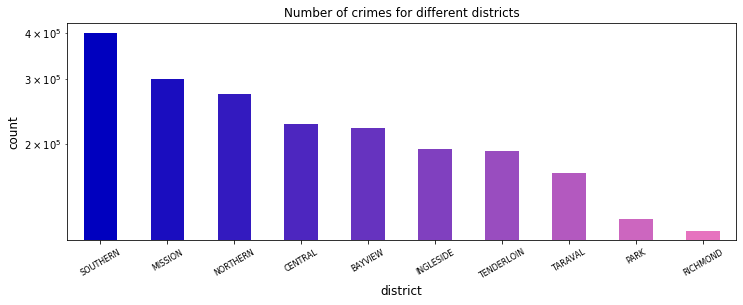

In [0]:
q3_df = q3_result.toPandas()
plt.figure()
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(q3_df))]
ax = q3_df.plot(kind = 'bar',x='PdDistrict',y = 'count',logy= True,color = my_colors,legend = False, align = 'center', figsize=(12, 4))
ax.set_ylabel('count',fontsize = 12)
ax.set_xlabel('district',fontsize = 12)
plt.xticks(fontsize=8, rotation=30)
plt.title('Number of crimes for different districts')
display()

* Top three danger districts with the highest number of crimes are Southern, Mission and Northern

In [0]:
# Plot the heatmap 
import json
import requests

url = 'https://cocl.us/sanfran_geojson'
san_geo = f'{url}'
cat = spark.sql("select PdDistrict, count(*) as Count from Temp group by 1")
tupleList2 = [[x['PdDistrict'],x['Count']] for x in cat.rdd.collect()]
tuple_df = pd.DataFrame(tupleList2,columns = ['PdDistrict','Count']) 

In [0]:
san_map = folium.Map(location=[37.77, -122.4], zoom_start=12)

# Create Choropleth map
folium.Choropleth(
    geo_data=san_geo,
    data=tuple_df.iloc[0:1000],
    columns=['PdDistrict','Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight=True,
    legend_name='Crime Counts in San Francisco'
).add_to(san_map)

san_map


Make this Notebook Trusted to load map: File -> Trust Notebook <iframe src="about:blank" style="position:absolute;width:100%;height:100%;left:0;top:0;border:none !important;" data-html=PCFET0NUWVBFIGh0bWw+CjxoZWFkPiAgICAKICAgIDxtZXRhIGh0dHAtZXF1aXY9ImNvbnRlbnQtdHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PVVURi04IiAvPgogICAgCiAgICAgICAgPHNjcmlwdD4KICAgICAgICAgICAgTF9OT19UT1VDSCA9IGZhbHNlOwogICAgICAgICAgICBMX0RJU0FCTEVfM0QgPSBmYWxzZTsKICAgICAgICA8L3NjcmlwdD4KICAgIAogICAgPHNjcmlwdCBzcmM9Imh0dHBzOi8vY2RuLmpzZGVsaXZyLm5ldC9ucG0vbGVhZmxldEAxLjYuMC9kaXN0L2xlYWZsZXQuanMiPjwvc2NyaXB0PgogICAgPHNjcmlwdCBzcmM9Imh0dHBzOi8vY29kZS5qcXVlcnkuY29tL2pxdWVyeS0xLjEyLjQubWluLmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9qcy9ib290c3RyYXAubWluLmpzIj48L3NjcmlwdD4KICAgIDxzY3JpcHQgc3JjPSJodHRwczovL2NkbmpzLmNsb3VkZmxhcmUuY29tL2FqYXgvbGlicy9MZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy8yLjAuMi9sZWFmbGV0LmF3ZXNvbWUtbWFya2Vycy5qcyI+PC9zY3JpcHQ+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vY2RuLmpzZGVsaXZyLm5ldC9ucG0vbGVhZmxldEAxLjYuMC9kaXN0L2xlYWZsZXQuY3NzIi8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vbWF4Y2RuLmJvb3RzdHJhcGNkbi5jb20vYm9vdHN0cmFwLzMuMi4wL2Nzcy9ib290c3RyYXAubWluLmNzcyIvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL21heGNkbi5ib290c3RyYXBjZG4uY29tL2Jvb3RzdHJhcC8zLjIuMC9jc3MvYm9vdHN0cmFwLXRoZW1lLm1pbi5jc3MiLz4KICAgIDxsaW5rIHJlbD0ic3R5bGVzaGVldCIgaHJlZj0iaHR0cHM6Ly9tYXhjZG4uYm9vdHN0cmFwY2RuLmNvbS9mb250LWF3ZXNvbWUvNC42LjMvY3NzL2ZvbnQtYXdlc29tZS5taW4uY3NzIi8+CiAgICA8bGluayByZWw9InN0eWxlc2hlZXQiIGhyZWY9Imh0dHBzOi8vY2RuanMuY2xvdWRmbGFyZS5jb20vYWpheC9saWJzL0xlYWZsZXQuYXdlc29tZS1tYXJrZXJzLzIuMC4yL2xlYWZsZXQuYXdlc29tZS1tYXJrZXJzLmNzcyIvPgogICAgPGxpbmsgcmVsPSJzdHlsZXNoZWV0IiBocmVmPSJodHRwczovL3Jhd2Nkbi5naXRoYWNrLmNvbS9weXRob24tdmlzdWFsaXphdGlvbi9mb2xpdW0vbWFzdGVyL2ZvbGl1bS90ZW1wbGF0ZXMvbGVhZmxldC5hd2Vzb21lLnJvdGF0ZS5jc3MiLz4KICAgIDxzdHlsZT5odG1sLCBib2R5IHt3aWR0aDogMTAwJTtoZWlnaHQ6IDEwMCU7bWFyZ2luOiAwO3BhZGRpbmc6IDA7fTwvc3R5bGU+CiAgICA8c3R5bGU+I21hcCB7cG9zaXRpb246YWJzb2x1dGU7dG9wOjA7Ym90dG9tOjA7cmlnaHQ6MDtsZWZ0OjA7fTwvc3R5bGU+CiAgICAKICAgICAgICAgICAgPG1ldGEgbmFtZT0idmlld3BvcnQiIGNvbnRlbnQ9IndpZHRoPWRldmljZS13aWR0aCwKICAgICAgICAgICAgICAgIGluaXRpYWwtc2NhbGU9MS4wLCBtYXhpbXVtLXNjYWxlPTEuMCwgdXNlci1zY2FsYWJsZT1ubyIgLz4KICAgICAgICAgICAgPHN0eWxlPgogICAgICAgICAgICAgICAgI21hcF82MmQ5OTE4ODg0NmI0YmEyYWY4ODJjNGI5YzAyYWQyZCB7CiAgICAgICAgICAgICAgICAgICAgcG9zaXRpb246IHJlbGF0aXZlOwogICAgICAgICAgICAgICAgICAgIHdpZHRoOiAxMDAuMCU7CiAgICAgICAgICAgICAgICAgICAgaGVpZ2h0OiAxMDAuMCU7CiAgICAgICAgICAgICAgICAgICAgbGVmdDogMC4wJTsKICAgICAgICAgICAgICAgICAgICB0b3A6IDAuMCU7CiAgICAgICAgICAgICAgICB9CiAgICAgICAgICAgIDwvc3R5bGU+CiAgICAgICAgCiAgICA8c2NyaXB0IHNyYz0iaHR0cHM6Ly9jZG5qcy5jbG91ZGZsYXJlLmNvbS9hamF4L2xpYnMvZDMvMy41LjUvZDMubWluLmpzIj48L3NjcmlwdD4KPC9oZWFkPgo8Ym9keT4gICAgCiAgICAKICAgICAgICAgICAgPGRpdiBjbGFzcz0iZm9saXVtLW1hcCIgaWQ9Im1hcF82MmQ5OTE4ODg0NmI0YmEyYWY4ODJjNGI5YzAyYWQyZCIgPjwvZGl2PgogICAgICAgIAo8L2JvZHk+CjxzY3JpcHQ+ICAgIAogICAgCiAgICAgICAgICAgIHZhciBtYXBfNjJkOTkxODg4NDZiNGJhMmFmODgyYzRiOWMwMmFkMmQgPSBMLm1hcCgKICAgICAgICAgICAgICAgICJtYXBfNjJkOTkxODg4NDZiNGJhMmFmODgyYzRiOWMwMmFkMmQiLAogICAgICAgICAgICAgICAgewogICAgICAgICAgICAgICAgICAgIGNlbnRlcjogWzM3Ljc3LCAtMTIyLjRdLAogICAgICAgICAgICAgICAgICAgIGNyczogTC5DUlMuRVBTRzM4NTcsCiAgICAgICAgICAgICAgICAgICAgem9vbTogMTIsCiAgICAgICAgICAgICAgICAgICAgem9vbUNvbnRyb2w6IHRydWUsCiAgICAgICAgICAgICAgICAgICAgcHJlZmVyQ2FudmFzOiBmYWxzZSwKICAgICAgICAgICAgICAgIH0KICAgICAgICAgICAgKTsKCiAgICAgICAgICAgIAoKICAgICAgICAKICAgIAogICAgICAgICAgICB2YXIgdGlsZV9sYXllcl9kYWMzOWMwNGY5NDk0ZjU2YTU1ODY1ZDQyNmNjMmQ4NCA9IEwudGlsZUxheWVyKAogICAgICAgICAgICAgICAgImh0dHBzOi8ve3N9LnRpbGUub3BlbnN0cmVldG1hcC5vcmcve3p9L3t4fS97eX0ucG5nIiwKICAgICAgICAgICAgICAgIHsiYXR0cmlidXRpb24iOiAiRGF0YSBieSBcdTAwMjZjb3B5OyBcdTAwM2NhIGhyZWY9XCJodHRwOi8vb3BlbnN0cmVldG1hcC5vcmdcIlx1MDAzZU9wZW5TdHJlZXRNYXBcdTAwM2MvYVx1MDAzZSwgdW5kZXIgXHUwMDNjYSBocmVmPVwiaHR0cDovL3d3dy5vcGVuc3RyZWV0bWFwLm9yZy9jb3B5cmlnaHRcIlx1MDAzZU9EYkxcdTA

##### 2.4: Count the number of crimes for each day of a week

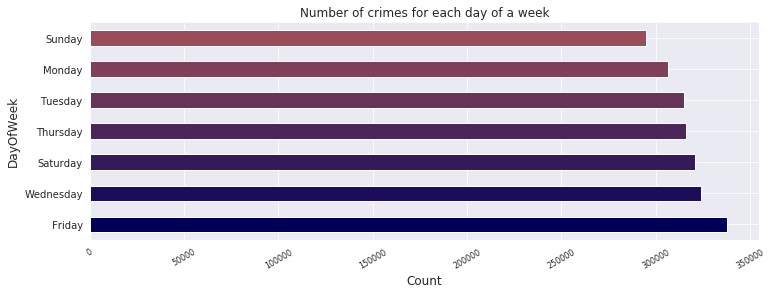

In [0]:
q4_result = df_opt1.groupby("DayOfWeek").count().orderBy("count", ascending=False)
q4_df = q4_result.toPandas()

plt.figure()
my_colors = [(x/10.0, x/20.0, 0.35) for x in range(len(q4_df))]
ax = q4_df.plot.barh(x='DayOfWeek',y ='count',color = my_colors,legend = False, align = 'center', figsize=(12, 4))
ax.set_ylabel('DayOfWeek',fontsize = 12)
ax.set_xlabel('Count',fontsize = 12)
plt.xticks(fontsize=8, rotation=30)
plt.title('Number of crimes for each day of a week')
display()

* From the plot above, we can see that most crime events happened in Friday, following by Wedneday and Saturday

##### 2.5: For each day of week, count the number of crimes for different districts

In [0]:
q5_result = df_opt1.groupby("PdDistrict","DayOfWeek").count().orderBy("PdDistrict", ascending=True)
q5_df = q5_result.toPandas()

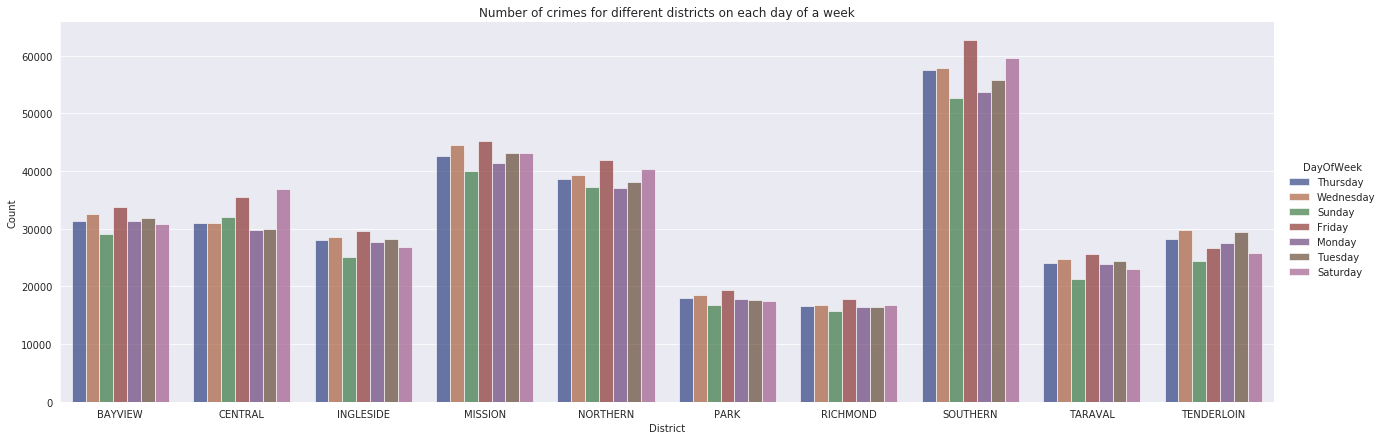

In [0]:
g = sb.catplot(
    data=q5_df, kind='bar',
    x ='PdDistrict', y='count', hue='DayOfWeek', ci='sd',
    palette='dark', alpha=.6, height=6,aspect = 3
)

g.set(title='Number of crimes for different districts on each day of a week', xlabel='District', ylabel='Count', fontsize=12)

* Southern district is much more dangerous than other 9 districts. For Tenderloin district, Wednesday is the day of week that crime events are most likely to occure. For Central district, Saturday is the day of week with the highest number of crimes. The crimes in the rest of districts were happened on Friday with highest number of occurrences.

##### 2.6: Count the number of crimes each day of week at "SF downtown"

In [0]:
# register the sql table and define the range of SF downtown
df_opt1.createOrReplaceTempView("sf_crime")
crimePosition = spark.sql("SELECT CAST(X AS float), CAST(Y AS float) FROM sf_crime WHERE X is not NULL and Y is not NULL and Y!=90 ORDER BY 2 DESC")
display(crimePosition)
crimePosition_info = spark.sql("SELECT avg(X) AS CenterX, max(X)-min(X) as RangeX, avg(Y) as CenterY, max(Y)-min(Y) as RangeY FROM sf_crime WHERE Y!=90")
display(crimePosition_info)


CenterX RangeX CenterY RangeY -122.42300858468029 -0.14889135989699298 37.76739012239146 0.1127418156566975

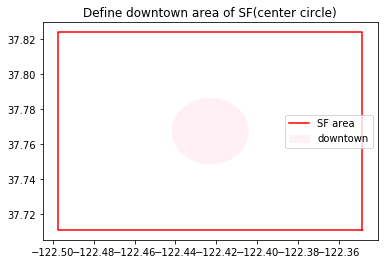

In [0]:
## Visualize downtown
from matplotlib.patches import Rectangle
x = -122.42300858032046
y = 37.76739009566873
sizex = -0.14889135989699298
sizey = 0.1127418156566975
rectx = [x-sizex/2,x+sizex/2,x+sizex/2,x-sizex/2,x-sizex/2]
recty = [y-sizey/2,y-sizey/2,y+sizey/2,y+sizey/2,y-sizey/2]
plt.plot(rectx,recty,color = 'red')
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
dtsize = sizex/8  # downtownarea is with the rangex/8 of the center of SF area
dtrectx = list(np.linspace(x-dtsize,x+dtsize,120))
dtrecty = [((dtsize)**2-(_-x)**2)**0.5+y for _ in dtrectx]+[-((dtsize)**2-(_-x)**2)**0.5+y for _ in dtrectx]
plt.fill(dtrectx+dtrectx,dtrecty,color= 'lavenderblush')
plt.legend(('SF area','downtown'))
plt.title('Define downtown area of SF(center circle)')
display()

In [0]:
crime_cnt_dt = spark.sql("SELECT DayOfWeek,COUNT(*) AS crime_cnt FROM sf_crime WHERE (X+122.42300858032046)*(X+122.42300858032046)+(Y-37.76739009566873)*(Y-37.76739009566873)<(0.14889135989699298/8)*(0.14889135989699298/8) GROUP BY 1 ORDER By crime_cnt")
display(crime_cnt_dt) 

DayOfWeek crime_cnt Sunday 79428 Monday 82591 Saturday 85076 Thursday 86196 Tuesday 86219 Wednesday 89260 Friday 89458

* Friday is still the day with the highest number of crimes compared to the number of crimes across the whole SF area.

##### 2.7: Analysis the number of crime in each month of 2015, 2016, 2017, 2018

In [0]:
# define udf
def date_to_month(x):
  m_y = [x.split('/')[0]]
  return ''.join(m_y)
def date_to_year(x):
  y = [x.split('/')[2]] 
  return int(''.join(y))
dtm_udf = udf(lambda x: date_to_month(x))
dty_udf = udf(lambda x: date_to_year(x))

In [0]:
# groupby month after 2014
df_opt2 = df_opt1.withColumn('Month',dtm_udf('Date')) # add a new column with date turned into month
df_opt3 = df_opt2.withColumn('Year',dty_udf('Date')) # add a new column with date turned into year
#display(df_opt3)
df_month_res = df_opt3.filter(df_opt3.Year>2014).groupBy('Year','Month').count().orderBy('Year','Month')
df_month_res_df = df_month_res.toPandas()
display(df_month_res)

Year Month count 2015 01 13606 2015 02 12329 2015 03 13929 2015 04 12959 2015 05 13729 2015 06 13304 2015 07 13365 2015 08 13730 2015 09 12896 2015 10 13147 2015 11 12091 2015 12 11441 2016 01 12966 2016 02 12106 2016 03 12380 2016 04 12328 2016 05 12732 2016 06 12094 2016 07 12191 2016 08 12471 2016 09 12499 2016 10 13388 2016 11 12720 2016 12 13007 2017 01 13084 2017 02 12192 2017 03 13711 2017 04 12941 2017 05 13267 2017 06 12605 2017 07 13171 2017 08 12872 2017 09 12684 2017 10 13355 2017 11 12347 2017 12 12544 2018 01 12031 2018 02 9947 2018 03 10740 2018 04 10306 2018 05 3644

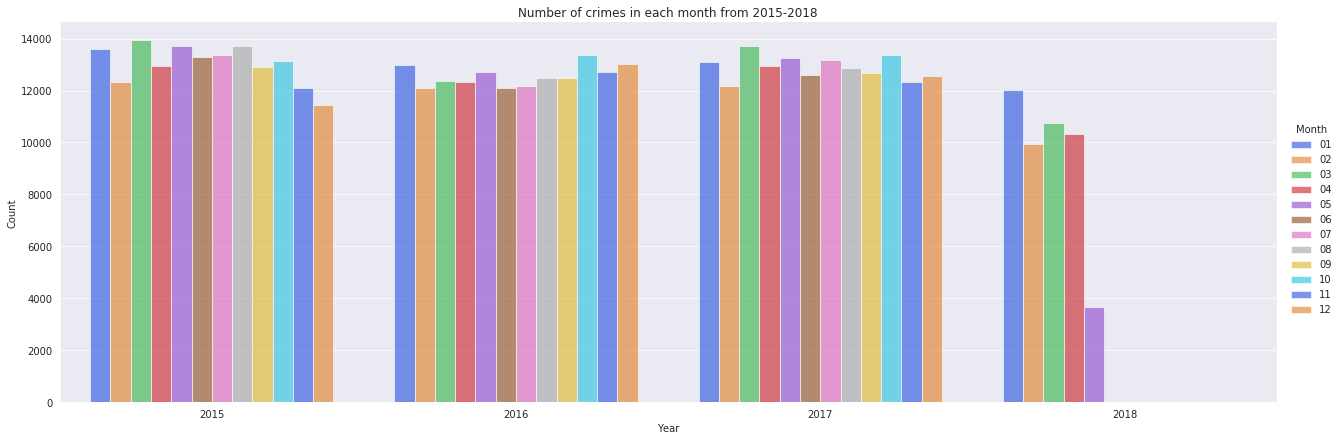

In [0]:
g = sb.catplot(
    data=df_month_res_df, kind='bar',
    x ='Year', y='count', hue='Month', ci='sd',
    palette='bright', alpha=.6, height=6,aspect = 3
)

g.set(title='Number of crimes in each month from 2015-2018', xlabel='Year', ylabel='Count', fontsize=12)

* The number of crimes in SF has dropped dramatiaclly since the first month of 2018, even though the crime data has not been collected since May in 2018.

##### 2.8: Analysis the number of crime w.r.t the hour on 2015/12/31, 2016/12/31, 2017/12/31.

In [0]:
# Define udf
def time_to_hour(x):
  return x.split(':')[0]
tth_udf = udf(lambda x: time_to_hour(x))
# groupby hour
df_opt4 = df_opt1.withColumn('Hour',tth_udf('Time')) # add a new column with hour extracted from time
df_hour_res = df_opt4.filter((df_opt4.Date =='12/31/2017')|(df_opt4.Date =='12/31/2016')|(df_opt4.Date =='12/31/2015')).groupBy(df_opt4.Date,'Hour').count().orderBy('count',ascending=False).groupBy('Hour').mean().orderBy("Hour",ascending=True)

display(df_hour_res)

Hour avg(count) 00 18.666666666666668 01 17.333333333333332 02 8.666666666666666 03 3.0 04 7.333333333333333 05 7.0 06 5.0 07 8.666666666666666 08 14.0 09 12.333333333333334 10 15.333333333333334 11 30.666666666666668 12 26.333333333333332 13 22.666666666666668 14 18.666666666666668 15 19.0 16 19.0 17 26.666666666666668 18 16.666666666666668 19 18.0 20 18.0 21 28.666666666666668 22 35.0 23 43.0

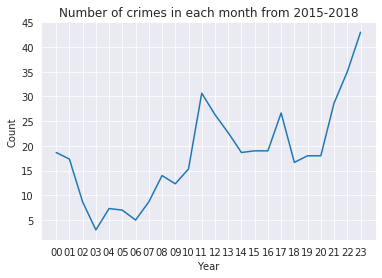

In [0]:
# Visualization
df_hour_res_pd = df_hour_res.toPandas()

sb.set_style("darkgrid")
sb.lineplot(
    data=df_hour_res_pd ,
    x='Hour', y='avg(count)'
).set(title='Number of crimes in each month from 2015-2018', xlabel='Year', ylabel='Count', fontsize=12)

* The peaks of crimes happens around lunch time, dinner time and midnight. My suggestion would be when travel in SF please be alert around lunch and dinner time and avoid outdoor actitivies around midnight.

##### 2.9: Find out the crime event w.r.t category and time (hour) from top-3 danger disrict

In [0]:
display(df_opt4)

IncidntNum Category Descript DayOfWeek Date Time PdDistrict Resolution Address X Y Location PdId Hour 146196161 NON-CRIMINAL LOST PROPERTY Tuesday 09/23/2014 01:00 SOUTHERN NONE 800 Block of BRYANT ST -122.403404791479 37.775420706711 POINT (-122.403404791479 37.775420706711) 14619616171000 01 150045675 ASSAULT BATTERY Thursday 01/15/2015 17:00 TARAVAL NONE 1800 Block of VICENTE ST -122.48560378101 37.7388214326705 POINT (-122.48560378101 37.7388214326705) 15004567504134 17 140632022 SUSPICIOUS OCC INVESTIGATIVE DETENTION Wednesday 07/30/2014 09:32 BAYVIEW NONE 100 Block of GILLETTE AV -122.396535107224 37.7106603302503 POINT (-122.396535107224 37.7106603302503) 14063202264085 09 150383259 ASSAULT BATTERY Saturday 05/02/2015 23:10 BAYVIEW ARREST, BOOKED 2400 Block of PHELPS ST -122.400130573297 37.7300925390327 POINT (-122.400130573297 37.7300925390327) 15038325904134 23 040753980 OTHER OFFENSES RECKLESS DRIVING Friday 07/02/2004 13:43 BAYVIEW NONE I-280 / CESAR CHAVEZ ST -120.5 90 POINT (-120.5 90) 4075398065020 13 040855122 SUICIDE SUICIDE BY JUMPING Tuesday 07/27/2004 15:19 SOUTHERN NONE 500 Block of I-80 -122.386667033903 37.7898821569191 POINT (-122.386667033903 37.7898821569191) 4085512260170 15 066085191 NON-CRIMINAL LOST PROPERTY Sunday 11/19/2006 17:45 BAYVIEW NONE 0 Block of GIANTS DR -122.38750147945 37.716878646429 POINT (-122.38750147945 37.716878646429) 6608519171000 17 050908404 VEHICLE THEFT STOLEN AUTOMOBILE Saturday 08/13/2005 17:00 TENDERLOIN NONE JENNINGS CT / INGALLS ST -120.5 90 POINT (-120.5 90) 5090840407021 17 090768064 ARSON ARSON OF A VEHICLE Tuesday 07/28/2009 23:26 BAYVIEW NONE SELBY ST / OAKDALE AV -122.399686082806 37.739901780585 POINT (-122.399686082806 37.739901780585) 9076806426031 23 111027676 ASSAULT BATTERY Saturday 12/24/2011 07:00 SOUTHERN NONE 0 Block of DORE ST -122.412933062384 37.7739274524819 POINT (-122.412933062384 37.7739274524819) 11102767604134 07 060508925 ASSAULT BATTERY Saturday 05/13/2006 11:26 NORTHERN NONE POLK ST / CEDAR ST -122.419834938618 37.7863580362743 POINT (-122.419834938618 37.7863580362743) 6050892504134 11 110318854 FRAUD FRAUDULENT CREDIT APPLICATION Thursday 04/14/2011 17:30 BAYVIEW NONE 100 Block of TOPEKA AV -122.398951090192 37.7338473162583 POINT (-122.398951090192 37.7338473162583) 11031885409340 17 131007921 SUSPICIOUS OCC SUSPICIOUS OCCURRENCE Thursday 11/28/2013 12:00 INGLESIDE NONE 1600 Block of DIAMOND ST -122.435709983124 37.7443688410754 POINT (-122.435709983124 37.7443688410754) 13100792164070 12 090333811 NON-CRIMINAL FOUND PROPERTY Monday 03/30/2009 21:00 NORTHERN NONE 300 Block of HAIGHT ST -122.428006990942 37.7724726132375 POINT (-122.428006990942 37.7724726132375) 9033381172000 21 050951798 NON-CRIMINAL LOST PROPERTY Saturday 08/20/2005 09:30 TENDERLOIN NONE 5THSTNORTH ST / EDDY ST -120.5 90 POINT (-120.5 90) 5095179871000 09 031057056 NON-CRIMINAL AIDED CASE, MENTAL DISTURBED Sunday 09/07/2003 11:37 SOUTHERN NONE 500 Block of I-80 -122.386667033903 37.7898821569191 POINT (-122.386667033903 37.7898821569191) 3105705664020 11 061079105 ASSAULT BATTERY Monday 10/09/2006 17:30 NORTHERN NONE 600 Block of WILLOW ST -122.42831052169 37.7823629069329 POINT (-122.42831052169 37.7823629069329) 6107910504134 17 050326981 VEHICLE THEFT STOLEN TRUCK Wednesday 03/23/2005 19:00 BAYVIEW NONE 0 Block of WATCHMAN WY -122.395251009931 37.7553443519568 POINT (-122.395251009931 37.7553443519568) 5032698107025 19 120444392 ASSAULT BATTERY Tuesday 06/05/2012 11:47 RICHMOND NONE 500 Block of ARGUELLO BL -122.458724812805 37.7802795296617 POINT (-122.458724812805 37.7802795296617) 12044439204134 11 051130171 VEHICLE THEFT VEHICLE, RECOVERED, AUTO Thursday 10/06/2005 17:30 RICHMOND NONE AVENUE OF THE PALMS / EUCLID AV -120.5 90 POINT (-120.5 90) 5113017107041 17 120767417 SECONDARY CODES DOMESTIC VIOLENCE Monday 09/24/2012 18:02 INGLESIDE ARREST, BOOKED 800 Block of BRUNSWICK ST -122.450482980088 37.708170291703 POINT (-122.450482980088 37.708170291703) 1207674171

In [0]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col

df_opt5=df_opt4.filter((df_opt4.PdDistrict =='SOUTHERN')|( df_opt4.Date =='MISSION')|(df_opt4.Date =='NORTHERN')).groupBy(df_opt4.Category,df_opt4.Hour).count().orderBy('count',ascending=False)

window = Window.partitionBy('Hour').orderBy(df_opt5['count'].desc())
df_opt5 = df_opt5.select('*', rank().over(window).alias('rank_cat')).orderBy('Hour',ascending=True)
display(df_opt5)

Category Hour count rank_cat ARSON 00 31 27 SUSPICIOUS OCC 00 923 7 MISSING PERSON 00 447 14 LIQUOR LAWS 00 31 27 SEX OFFENSES, NON FORCIBLE 00 20 30 SEX OFFENSES, FORCIBLE 00 286 15 EXTORTION 00 15 31 LOITERING 00 8 32 FORGERY/COUNTERFEITING 00 858 8 SECONDARY CODES 00 197 16 BRIBERY 00 8 32 LARCENY/THEFT 00 4163 1 RUNAWAY 00 8 32 DRUNKENNESS 00 170 17 FAMILY OFFENSES 00 6 35 GAMBLING 00 3 36 OTHER OFFENSES 00 2947 2 WEAPON LAWS 00 166 18 SUICIDE 00 3 36 EMBEZZLEMENT 00 131 19 ASSAULT 00 1714 4 WARRANTS 00 749 9 STOLEN PROPERTY 00 122 20 FRAUD 00 1174 5 DRUG/NARCOTIC 00 648 10 TRESPASS 00 102 21 DRIVING UNDER THE INFLUENCE 00 87 22 ROBBERY 00 501 11 RECOVERED VEHICLE 00 55 23 KIDNAPPING 00 47 24 VANDALISM 00 1052 6 VEHICLE THEFT 00 496 12 DISORDERLY CONDUCT 00 37 25 NON-CRIMINAL 00 2414 3 BAD CHECKS 00 35 26 BURGLARY 00 486 13 PROSTITUTION 00 31 27 DRIVING UNDER THE INFLUENCE 01 101 18 TRESPASS 01 64 20 STOLEN PROPERTY 01 86 19 RECOVERED VEHICLE 01 49 21 FORGERY/COUNTERFEITING 01 49 21 KIDNAPPING 01 42 23 ARSON 01 27 24 DISORDERLY CONDUCT 01 24 25 PROSTITUTION 01 15 26 RUNAWAY 01 4 29 SUICIDE 01 5 28 FAMILY OFFENSES 01 4 29 BRIBERY 01 3 31 LOITERING 01 3 31 EMBEZZLEMENT 01 3 31 SEX OFFENSES, NON FORCIBLE 01 2 34 LIQUOR LAWS 01 13 27 BAD CHECKS 01 1 35 EXTORTION 01 1 35 ASSAULT 01 1506 2 LARCENY/THEFT 01 2577 1 NON-CRIMINAL 01 1243 4 OTHER OFFENSES 01 1415 3 VANDALISM 01 705 5 ROBBERY 01 522 6 WARRANTS 01 468 7 SUSPICIOUS OCC 01 402 8 DRUG/NARCOTIC 01 391 9 BURGLARY 01 359 10 DRUNKENNESS 01 158 13 VEHICLE THEFT 01 310 11 MISSING PERSON 01 174 12 FRAUD 01 146 14 SECONDARY CODES 01 115 15 WEAPON LAWS 01 114 16 SEX OFFENSES, FORCIBLE 01 102 17 ARSON 02 25 24 LOITERING 02 2 30 ASSAULT 02 1466 2 OTHER OFFENSES 02 1077 3 NON-CRIMINAL 02 987 4 VANDALISM 02 650 5 ROBBERY 02 559 6 WARRANTS 02 358 9 BURGLARY 02 400 7 SUSPICIOUS OCC 02 366 8 VEHICLE THEFT 02 304 10 DRUG/NARCOTIC 02 277 11 MISSING PERSON 02 134 12 DRUNKENNESS 02 127 13 SECONDARY CODES 02 113 14 FRAUD 02 108 16 SEX OFFENSES, FORCIBLE 02 110 15 WEAPON LAWS 02 100 17 DRIVING UNDER THE INFLUENCE 02 84 18 TRESPASS 02 67 19 STOLEN PROPERTY 02 48 20 KIDNAPPING 02 38 21 FORGERY/COUNTERFEITING 02 27 22 LIQUOR LAWS 02 13 26 DISORDERLY CONDUCT 02 25 24 PROSTITUTION 02 10 27 SUICIDE 02 5 28 BRIBERY 02 3 29 EMBEZZLEMENT 02 2 30 FAMILY OFFENSES 02 2 30 LARCENY/THEFT 02 1778 1 RUNAWAY 02 2 30 EXTORTION 02 1 34 RECOVERED VEHICLE 02 26 23 BAD CHECKS 02 1 34 BURGLARY 03 417 6 NON-CRIMINAL 03 618 4 VANDALISM 03 471 5 ROBBERY 03 327 7 WARRANTS 03 274 8 SUSPICIOUS OCC 03 243 9 DRUG/NARCOTIC 03 203 10 VEHICLE THEFT 03 142 11 SECONDARY CODES 03 70 13 SEX OFFENSES, FORCIBLE 03 84 12 MISSING PERSON 03 66 14 FRAUD 03 58 15 WEAPON LAWS 03 58 15 TRESPASS 03 45 17 DRUNKENNESS 03 44 18 DRIVING UNDER THE INFLUENCE 03 41 19 RECOVERED VEHICLE 03 34 21 KIDNAPPING 03 26 23 ARSON 03 21 24 DISORDERLY CONDUCT 03 18 25 PROSTITUTION 03 10 26 EMBEZZLEMENT 03 5 27 LOITERING 03 3 29 FORGERY/COUNTERFEITING 03 27 22 SUICIDE 03 2 30 EXTORTION 03 2 30 LIQUOR LAWS 03 4 28 RUNAWAY 03 1 32 PORNOGRAPHY/OBSCENE MAT 03 1 32 BRIBERY 03 1 32 LARCENY/THEFT 03 952 1 STOLEN PROPERTY 03 37 20 OTHER OFFENSES 03 710 2 ASSAULT 03 697 3 NON-CRIMINAL 04 477 3 ASSAULT 04 400 4 BURGLARY 04 361 5 VANDALISM 04 329 6 ROBBERY 04 226 7 WARRANTS 04 196 8 SUSPICIOUS OCC 04 156 9 DRUG/NARCOTIC 04 132 11 VEHICLE THEFT 04 148 10 MISSING PERSON 04 47 12 WEAPON LAWS 04 45 13 SECONDARY CODES 04 42 14 TRESPASS 04 39 15 SEX OFFENSES, FORCIBLE 04 34 16 STOLEN PROPERTY 04 32 17 RECOVERED VEHICLE 04 20 20 DRUNKENNESS 04 22 19 ARSON 04 20 20 DRIVING UNDER THE INFLUENCE 04 12 22 FORGERY/COUNTERFEITING 04 11 23 KIDNAPPING 04 9 24 DISORDERLY CONDUCT 04 9 24 LIQUOR LAWS 04 5 26 PROSTITUTION 04 5 26 EMBEZZLEMENT 04 3 28 BRIBERY 04 2 29 LOITERING 04 2 29 BAD CHECKS 04 2 29 FAMILY OFFENSES 04 1 32 EXTORTION 04 1 32 FRAUD 04 26 18 SEX OFFENSES, NON FORCIBLE 04 1 32 OTHER OFFENSES 04 566 2 LARCENY/THEFT 04 628 1 OTHER OFFENSES 05 386 3 NON-CRIMINAL 05 447 2 ASSAUL

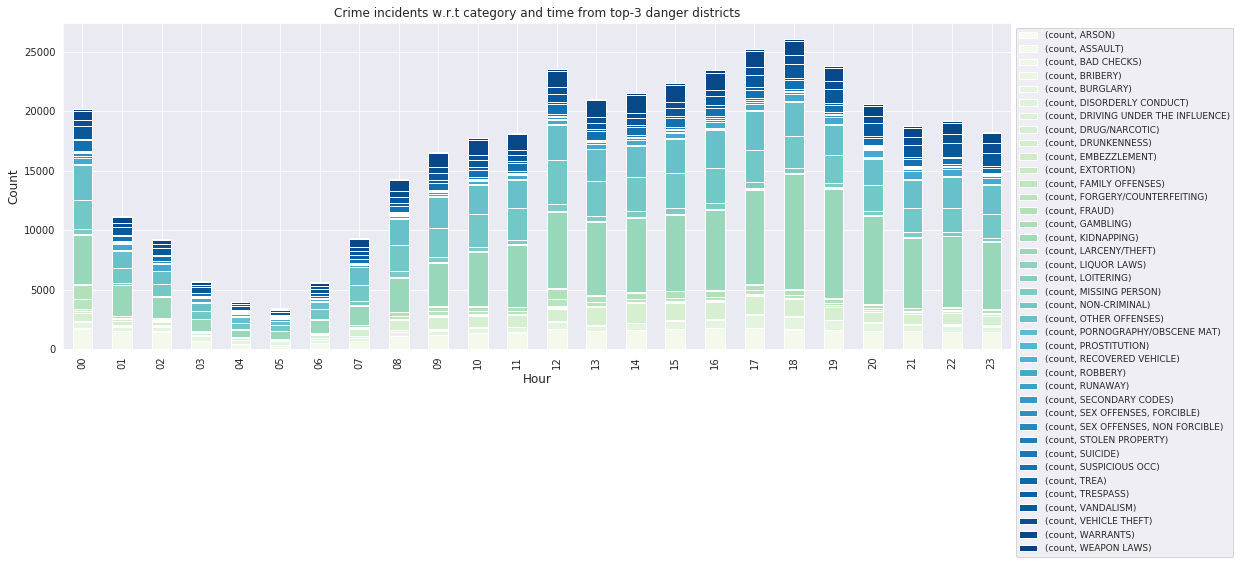

In [0]:
df_opt5_pd = df_opt5.toPandas()
new_df = df_opt5_pd[['Category','Hour','count']].pivot(columns = 'Category',index = 'Hour')
plt.figure()
colors = plt.cm.GnBu(np.linspace(0, 1, 39))
ax = new_df.plot(kind='bar',stacked=True,legend=True,figsize=(17, 6),color = colors)
ax.set_ylabel('Count',fontsize = 12)
ax.set_xlabel('Hour',fontsize = 12)
plt.title('Crime incidents w.r.t category and time from top-3 danger districts')
plt.legend(fontsize = 9,bbox_to_anchor=(1, 1))
display()

* In top-3 danger district, the number of crimes increases since morning and peaks around 6pm and gradually declines after midnight. Theft is the most common case and number of thefts varies the most over time. SFPD should probably distribute more police during 8am - 12am and more police to handle theft case since number of crimes in other categories does not change much in each hour during the day.

##### 2.10: For different category of crime, find the percentage of resolution.

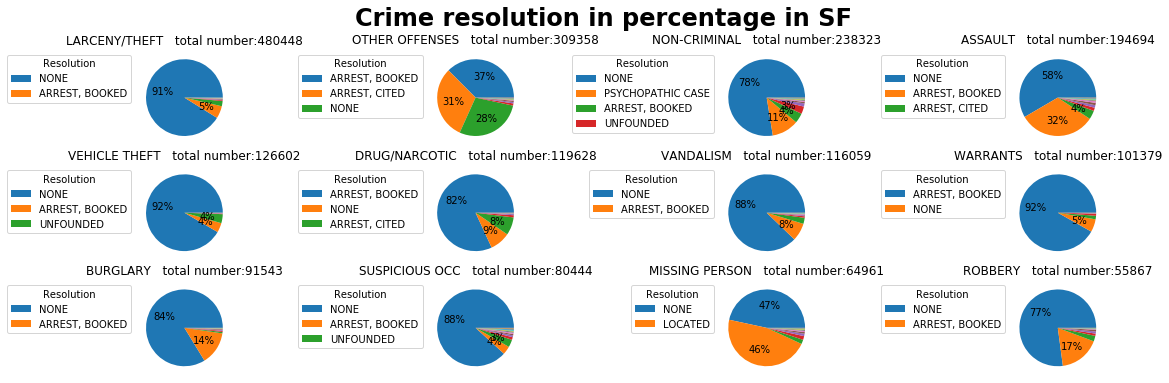

In [0]:
category =[row['category'] for row in q2_result.select('category').collect()] 
category_cnt =[row['count'] for row in q2_result.select('count').collect()] 
# print(type(category)) #list
q_10 = spark.sql("SELECT  category, Resolution FROM sf_crime GROUP")

# visulize the result
# for each crime, a dataframe was saved under the crime name in a dictionary df
thres = 3 # did not show resolution below 3%
def autopct_more_than_thres(pct):
    return ('%1.f%%' % pct) if pct >thres else ''
m,n = 3,4 # There are about 39 crime categories in total, here I took a peek of the 12 highest
df = {} #save every crime dataframe in a dictionary
fig, ax = plt.subplots(m,n,figsize=(20, 6))
plt.suptitle('Crime resolution in percentage in SF',fontsize = 24,fontweight='bold')
for i,j in enumerate(category[0:m*n]): 
  x= df_opt1.filter(q_10.category == j).groupBy('Resolution').count().orderBy('count',ascending = False)
  x = x.withColumn('percentage',x['count']/category_cnt[i])
  df[category[i]]=x
  cat_res = x.toPandas()
  temp_ax = ax[i//n,i%n]
  temp_ax.set_title(category[i]+'   total number:'+str(category_cnt[i]))
  xlabels = x.filter(x.percentage>(thres*0.01)).select('Resolution').orderBy('percentage',ascending = False)
  labels = xlabels.toPandas()
  wedges,texts,autotexts = temp_ax.pie(cat_res['count'],autopct=autopct_more_than_thres)
  temp_ax.legend(wedges,labels['Resolution'],title="Resolution",loc='upper right',bbox_to_anchor=(0, 1))
display(fig)

* By analyzing the total number of occurences by category of crime and the percentage resolution rate, we can see that the police department is very efficient at solving 'Drug', 'Warrant', and 'Other Offenses' types of crime. However, the rest of crime categories such as larceny/theft, vehicle theft, vandalism, and robbery cases, the resolution rate is very low. Police should apply additional resources to solving these theft-related crimes such as security monitoring so as to increase resolution rate for these highly occuring crime categories.

#### Summary
In this notebook I utilized Dataframe,Spark Sql and Data visulization to help me understand the data and study the trends and potential problems. 

The analysis shows that Larceny/Theft is the most common crime in SF area. Eeven though police department is particuraly good at solving some specific types of crimes but not good at sovling theft reltaed crimes. The solution to that can be either increase police to handle those cases or add investment to security monotoring like facial recognition technology to prevent the crime or help police to identify the suspects more efficiently. 

The most dangerous district is Southern and the crimes happened more often on Friday in most of districts including downtwon area except Tenderloin and Central district. Based on that information, the SFPD may assign different number of police to each day of a week. 

The number of crime events decrease since 2018. What are the driving factors behind this decline? Better economy for people from low-income community can find a jor for living? More financial subsidy to SFPD, making more police officer employeed? or increasing security monitors so that people are afraid of being caught? We do not know yet. Can dig more insights by obtaining the information and data of financial subsidy and employment in SFPD.

In the top-3 danger districts, most of crime occured at lunchtime, dinnertime and midnight. Visitors and residents need to be more cautious. It would be better not leave personal belongings and valuable items in the car.